In [1]:
from QHD import *

In [78]:
q, p, p2, x, x2, xp, dt, mass, alpha, D, px, px2 = symbols("q, p, p2, x, x2, xp, dt, mass, alpha, D, px, px2")
alp = alpha

x = exp(-alpha*q)

In [26]:
x

In [27]:
x1 = sympify(str(time_deriv(x, 1)).replace("exp(-alpha*q)", "x"))

x1

print(x1)

x1 = (symmetrize(x1))*(0.5)*dt + x

print(x1)

-alpha*p*x/mass
-0.5*alpha*dt*px/mass + exp(-alpha*q)


In [28]:
x21 = sympify(str(time_deriv(x, 2)).replace("exp(-2*alpha*q)", "x2"))

x21

x21 = symmetrize(x21)*(0.5)*dt + x2

In [29]:
q1 = time_deriv(q, 1)*dt + q

In [30]:
q21 = time_deriv(q, 2)*dt + q2

NameError: name 'q2' is not defined

In [31]:
p1 = str(time_deriv(p, 1)).replace("v(q)", str(potential_sym))

p1 = expand(sympify(p1).doit())

p1 = str(p1).replace("exp(-2*alpha*q)", "x2").replace("alpha**2", "0")

p1 = sympify(p1)

p1 = str(symmetrize(p1)*(0.5)*dt + p).replace("exp(-alpha*q)", "x")

p1

'dt*(1.0*D*alpha*x2 - 1.0*D*alpha*x) + p'

In [32]:
q_0 = 0

potential_sym = D * (1 - exp(-alpha*(q-q_0)))**2

diff1 = diff(potential_sym, q)
diff2 = diff(diff1, q)



new = str(time_deriv(p, 2)).replace("v(q)", str(potential_sym))

new = sympify(new).doit()

new = expand(new)

new = str(new).replace("exp(-alpha*q)", "x").replace("exp(-2*alpha*q)", "x2").replace("alpha**2", "0")

new = (sympify(new))

new

p21 = new

print(p21)
x = Symbol("x")
p21 = str(symmetrize(p21)).replace("exp(-alpha*q)", "x")

p21 = sympify(p21)

print(p21)

print(expand(-p21))

4*D*alpha*p*x - 4*D*alpha*p*x2
4*D*alpha*px - 4*D*alpha*(-2*p*x**2 + p*x2 + 2*px*x)
-8*D*alpha*p*x**2 + 4*D*alpha*p*x2 + 8*D*alpha*px*x - 4*D*alpha*px


In [81]:
dt = Symbol("dt")

x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
print(x2)
x2 = exp(-2.0*alp*p*dt/mass)*x2
x2 = x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt
x2 = sympify(str(x2).replace("exp(-alpha*q)", "x"))
print(x2)

x2 = Symbol("x2")
x21 = sympify(str(time_deriv(x, 2)).replace("exp(-2*alpha*q)", "x2").replace("exp(-alpha*q)", "x"))
x21 = str(symmetrize(x21)).replace("exp(-2*alpha*q)", "x2").replace("exp(-alpha*q)", "x")
x21 = str((sympify(x21)*0.5*dt+x2))
print(x21)
x21 = str(symmetrize(x21))
print("\n" + x21)

-2.0*alpha*dt*(-p*exp(-alpha*q) + xp)*exp(-alpha*q)/mass + x2
-2.0*alpha*dt*x*(-p*x + xp)/mass + (-2.0*alpha*dt*x*(-p*x + xp)/mass + x2)*exp(-2.0*alpha*dt*p/mass)
-1.0*alpha*dt*(-2*p*x**2 + p*x2 + 2*px*x)/mass + x2

-1.0*alpha*dt*(-2*p*x**2 + p*x2 - 2*px**2 + 4*px*x)/mass + x2


(p*x + x*p)/2
-hbar*i*Derivative(-hbar*i*Derivative(1, q), q)/(2*mass)*p*x/2 + x*p/2*f(q) - p*x/2 + x*p/2*-hbar*i*Derivative(-hbar*i*Derivative(1, q), q)/(2*mass)*f(q) - p*x/2 + x*p/2*v(q)*f(q) + v(q)*p*x/2 + x*p/2*f(q)
1*p**2*x**2*Derivative(0, (q, 2))/(8*mass) + 1*p*x*Derivative(0, (q, 2))/(4*mass) + p*x*0*v(q)/2 + p*x*0 + p*x*v(q)/2 - p*x
p*v(q)*exp(-alpha*q)/2 - p*exp(-alpha*q) + p**2*exp(-2*alpha*q)*Derivative(0, (q, 2))/(8*mass) + p*exp(-alpha*q)*Derivative(0, (q, 2))/(4*mass)


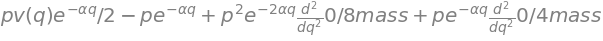

In [249]:
x, p = symbols("x, p")
x = Operator(x)
p = Operator(p)
#x, p= symbols("x, p")
xp = (x*p+p*x)/2
print(xp)

a1 = str(time_deriv(xp, 1)).replace("x", "exp(-alpha*q)")#.replace("Derivative(0, (q, 2))", "p").replace("p*x", "px").replace("p**2", "0").replace("v(q)", "0")

a1 = sympify(a1)
print(a1)
a1

In [77]:
def symmetrize(expr):
    p, x2, x, px, xp = symbols("p, x2, x, px, xp")
    expr1 = str(expr)
    expr1 = expr1.replace("p*x2", "(x2*p-2*x*x*p+2*x*px)").replace("p*x", "px")
    return eval(expr1)

In [251]:
px, px2 = symbols("px, px2")

symmetrize(new)

In [252]:
xp = N(xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) ))
xp = N(exp(-2.0*alp*p*dt/mass)*xp)
xp = N(xp + 0.5*dt*(2.0*alp*D*(x*(3.0*x2 - 2*x*x) - x2)  - (alp*x/mass)*(p2 - 2.0*p*p) ))

x2 = N(x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt)
x2 = N(exp(-2.0*alp*p*dt/mass)*x2)
x2 = N(x2 - 4.0*(alp/mass)*x*(xp - x*p)*0.5*dt)

In [253]:
convert = (1.0/17.586)

mass,q0,p0,s0,ps0,T,dt = 2980.0*convert, 0.15, 0.0, 0.05, 0.0, 5000, 0.01
q_list = []
t_list = []

alp = 2.567
D = 4.419 # eV
#    D = 1.0

m = mass
alp = 2.567
alpha = 2.567
hbar = 0.6582

t = 0.0    
Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = math.exp(-alp*q0)*math.exp(0.5*alp*alp*s0*s0)
x2 = exp(-2.0*alp*q0)*exp(2.0*alp*alp*s0*s0)
xq = x*(q-alp*s0*s0)
xp = x*(p - s0*ps0*alp)

In [254]:
## Try integrating ##
#q, p, p2, x, x2, xp, dt, mass, alpha, D = symbols("q, p, p2, x, x2, xp, dt, mass, alpha, D")

px = xp

xp = xp
print(xp)
x2 = x2
print(x2)
x = eval(str(x1))
print(x)
p2 = eval(str(p21))
print(p2)
p = eval(str(p1))
print(p)
q = eval(str(q1))
print(q)
p = eval(str(p1))
print(p)
p2 = eval(str(p21))
print(p2)
x = eval(str(x1))
print(x)
x2 = x2
print(x2)
xp = xp
print(xp)

0.0
0.478474407197594
0.680416614523327
43.3227240000000
-0.0229074617058058
0.149998648152277
-0.0458149234116117
43.3179118777678
0.680418975704468
0.478474407197594
0.0


In [255]:
q

In [256]:
i=0
while i<1:        
    s = (q2 - q*q)
    if s>0.0:
        s = math.sqrt(s)
    else: 
        s = 0.0
    if s>0.0:
        ps = (pq - p*q)/s
    else: 
        ps = 0.0
    q_list.append(q)
    t_list.append(t)
    i = i+1


while t<=T:
    
#    q,p,pq,q2,p2,x,x2,xp,xq, Etot0, Etot_cl0 = gqhd_step(q,p,pq,q2,p2,x,x2,xp,xq,dt,mass,alp,D)

    xp = xp
#    print(xp)
    x2 = x2
#    x2 = eval(str(x21))
#    print(x2)
    x = eval(str(x1))
#    print(x)
    p2 = eval(str(p21))
#    print(p2)
    p = eval(str(p1))
    print(p)
    q = eval(str(q1))
#    print(q)
    p = eval(str(p1))
    print(p)
    p2 = eval(str(p21))
#    print(p2)
    x = eval(str(x1))
#    print(x)
    x2 = x2
#    x2 = eval(str(x21))
#    print(x2)
    xp = xp
#    print(xp)

#    Ekin_cl = 0.5*p*p/mass
#    Ekin    = 0.5*p2/mass
#    Epot_cl = D*(math.exp(-2.0*alp*q) - 2.0*math.exp(-alp*q))
#    Epot    = D*(x2 - 2.0*x)
#    Etot_cl = Ekin_cl + Epot_cl
#    Etot    = Ekin    + Epot

    t = t + dt

    i=0
    while i<1:
        s = (q2 - q*q)
        if s>0.0:
            s = math.sqrt(s)
        else: 
            s = 0.0
        if s>0.0:
            ps = (pq - p*q)/s
        else: 
            ps = 0.0

        q_list.append(q)
        t_list.append(t)
            
        i = i+1

-0.0687226529597240
-0.0916303825078363
-0.114538915591577
-0.137447448675317
-0.160357321017265
-0.183267193359212
-0.206178940734889
-0.229090688110566
-0.252004846372124
-0.274919004633682
-0.297836109733598
-0.320753214833515
-0.343673802848299
-0.366594390863084
-0.389518998016991
-0.412443605170899
-0.435372767859663
-0.458301930548427
-0.481236185363003
-0.504170440177580
-0.527110323927912
-0.550050207678244
-0.572996257417049
-0.595942307155853
-0.618895060202425
-0.641847813248998
-0.664807807213046
-0.687767801177095
-0.710735573982600
-0.733703346788106
-0.756679436697212
-0.779655526606318
-0.802640472243250
-0.825625417880183
-0.848619758255207
-0.871614098630232
-0.894618373163645
-0.917622647697058
-0.940637396243219
-0.963652144789379
-0.986677907660779
-1.00970367053218
-1.03274098852356
-1.05577830651494
-1.07882772092745
-1.10187713533996
-1.12493918800537
-1.14800124067078
-1.17107647397573
-1.19415170728069
-1.21724066419102
-1.24032962110136
-1.26343284518647
-1.

-17.0806144002084
-17.1311200365711
-17.1818971466049
-17.2326742566388
-17.2837251597178
-17.3347760627968
-17.3861031014754
-17.4374301401539
-17.4890356804791
-17.5406412208043
-17.5925276526327
-17.6444140844611
-17.6965838217813
-17.7487535591015
-17.8012090403615
-17.8536645216214
-17.9064082100609
-17.9591518985004
-18.0121862824892
-18.0652206664780
-18.1185482598594
-18.1718758532408
-18.2254991956807
-18.2791225381206
-18.3330441954621
-18.3869658528037
-18.4411884174281
-18.4954109820524
-18.5499370732452
-18.6044631644380
-18.6592954287616
-18.7141276930853
-18.7692688047580
-18.8244099164306
-18.8798625777109
-18.9353152389911
-18.9910821805695
-19.0468491221478
-19.1029331035443
-19.1590170849409
-19.2154208949098
-19.2718247048788
-19.3285511618197
-19.3852776187607
-19.4423295711367
-19.4993815235127
-19.5567618502755
-19.6141421770383
-19.6718537880607
-19.7295653990830
-19.7876112355984
-19.8456570721138
-19.9040401071636
-19.9624231422134
-20.0211463811015
-20.079869

-611.467184066671
-625.702822715523
-641.325373611053
-656.947924506583
-674.169961604083
-691.391998701582
-710.471680876933
-729.551363052284
-750.805292261678
-772.059221471072
-795.879895756190
-819.700570041308
-846.580460937614
-873.460351833920
-904.025725430880
-934.591099027840
-969.650492720848
-1004.70988641386
-1045.32519036652
-1085.94049431918
-1133.53390335214
-1181.12731238509
-1237.64707590341
-1294.16683942173
-1362.35306285539
-1430.53928628906
-1514.36756165032
-1598.19583701159
-1703.65362664112
-1809.11141627065
-1945.63672283470
-2082.16202939876
-2265.50362065601
-2448.84521191326
-2707.27716149585
-2965.70911107843
-3355.19264657128
-3744.67618206413
-4392.19426422041
-5039.71234637668
-6299.31271958166
-7558.91309278664
-10829.8872999829
-14100.8615071792
-30973.5005677189
-47846.1396282586
-1888347.55682018
-3728848.97401210
-3.15962919793314e+130
-6.31925839586628e+130
-1.33098545741925e+20787253063613990558095647548396777494422776039129933511446280722554019

OverflowError: too many digits in integer

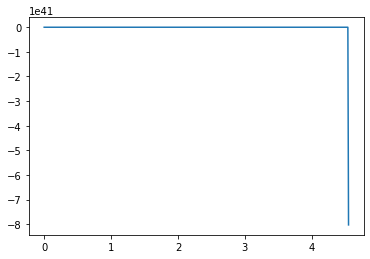

In [183]:
import matplotlib.pyplot as plt

plt.plot(t_list, q_list)